# Exploratory Data Analysis on Dataset - Terrorism 

## Importing all the libraries required for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

In [3]:
data=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [9]:
# lets find out the columns with missing values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

## Cleaning the data

In [10]:
#lets trim down columns for the columns we want to investigate
data = data[['iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','longitude',
             'success','suicide', 'attacktype1_txt','targtype1_txt','targsubtype1_txt',
             'target1','natlty1_txt','gname','gsubname','nperps','weaptype1_txt','nkill','nkillus']]

In [11]:
months = data['imonth'].value_counts()

In [12]:
data = data[data.imonth != 0]
data['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
Name: imonth, dtype: int64

## Exploratory Data Analysis of Global Terrorism

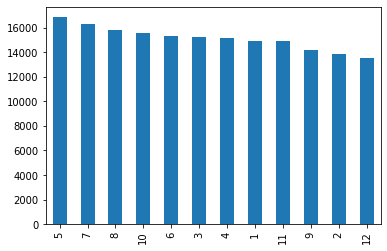

In [13]:
# which months does terror occur the most?
data['imonth'].value_counts(sort=True).plot.bar()

In [14]:
data['iday'].value_counts()

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      871
Name: iday, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D48B36EF48>,
      dtype=object)

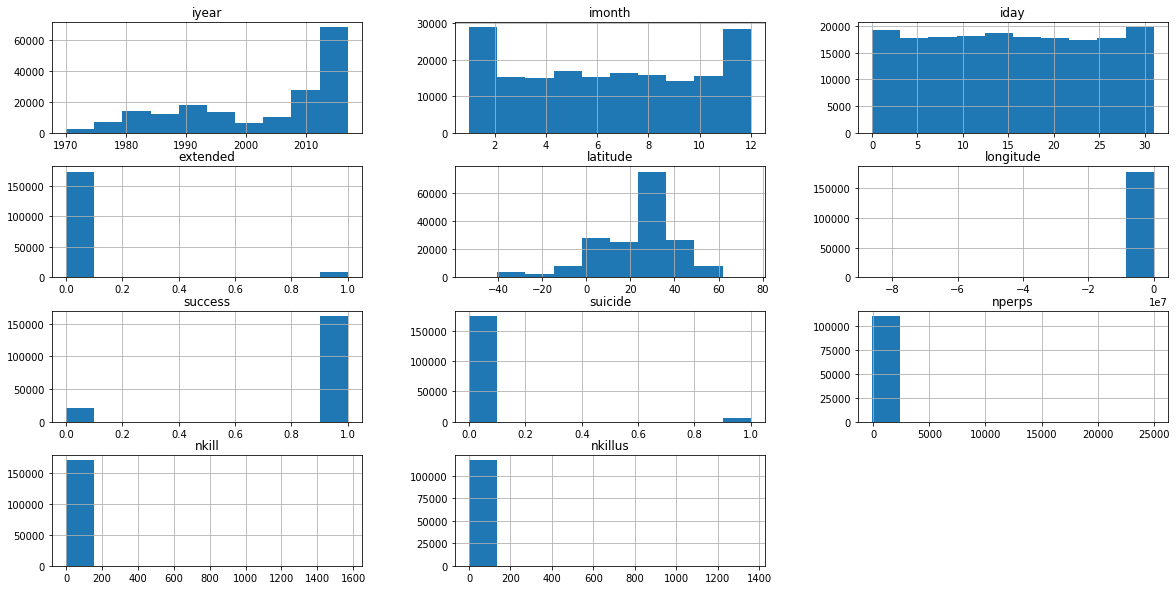

In [20]:
# Distribution of data on each series in DataFrame
data.hist(figsize=(20,10))

In [21]:
data.describe(include='all')

,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,success,...,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,nkill,nkillus
count,181671.000000,181671.000000,181671.000000,181671.000000,181671,181671,181237,177119.000000,1.771180e+05,181671.000000,...,181671,171299,181036,180112,181671,5889,110575.000000,181671,171369.000000,117244.000000
unique,NaN,NaN,NaN,NaN,205,12,36674,NaN,NaN,NaN,...,22,112,85991,215,3537,1183,NaN,12,NaN,NaN
top,NaN,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,NaN,...,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Iraq,Unknown,Militants,NaN,Explosives,NaN,NaN
freq,NaN,NaN,NaN,NaN,24636,50472,9772,NaN,NaN,NaN,...,43507,11595,6461,24113,82775,480,NaN,92416,NaN,NaN
mean,2002.641842,6.467989,15.507351,0.045346,NaN,NaN,NaN,23.497855,-4.587388e+02,0.889592,...,NaN,NaN,NaN,NaN,NaN,NaN,-65.361809,NaN,2.403381,0.045981
std,13.257340,3.387810,8.813028,0.208062,NaN,NaN,NaN,18.569049,2.047882e+05,0.313399,...,NaN,NaN,NaN,NaN,NaN,NaN,216.537503,NaN,11.546032,5.681879
min,1970.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,NaN,NaN,NaN,11.509901,4.549012e+00,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,NaN,NaN,NaN,31.467463,4.324651e+01,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,NaN,NaN,NaN,34.683346,6.871033e+01,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,0.000000


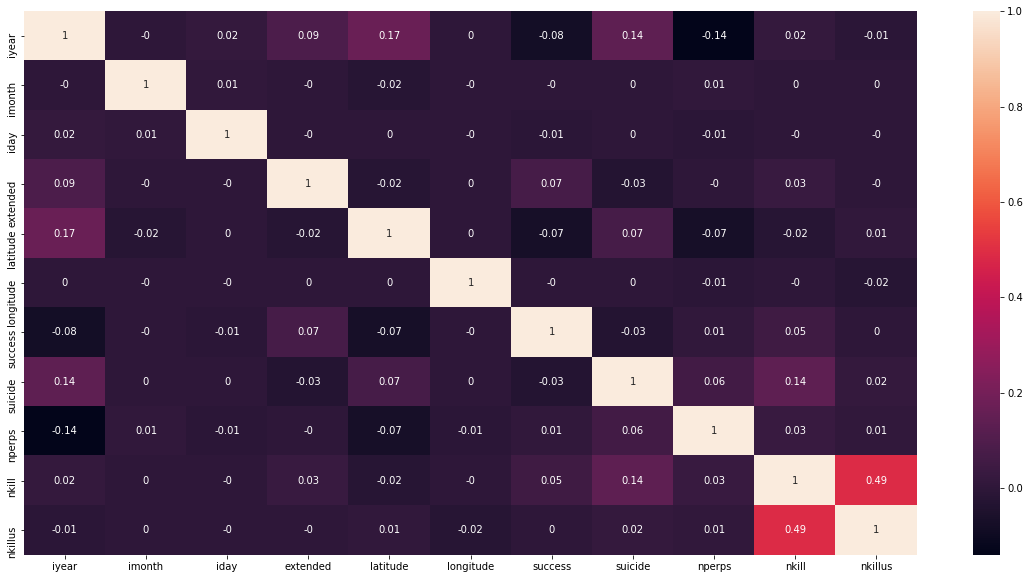

In [22]:
# Showing the Corelation between columns in the dataframe
plt.figure(figsize=(20,10))
sns.heatmap(np.round(data.corr(),2), annot=True)

Text(0.5, 1.0, 'Number of terrorist attacks each year from 1970 to 2017')

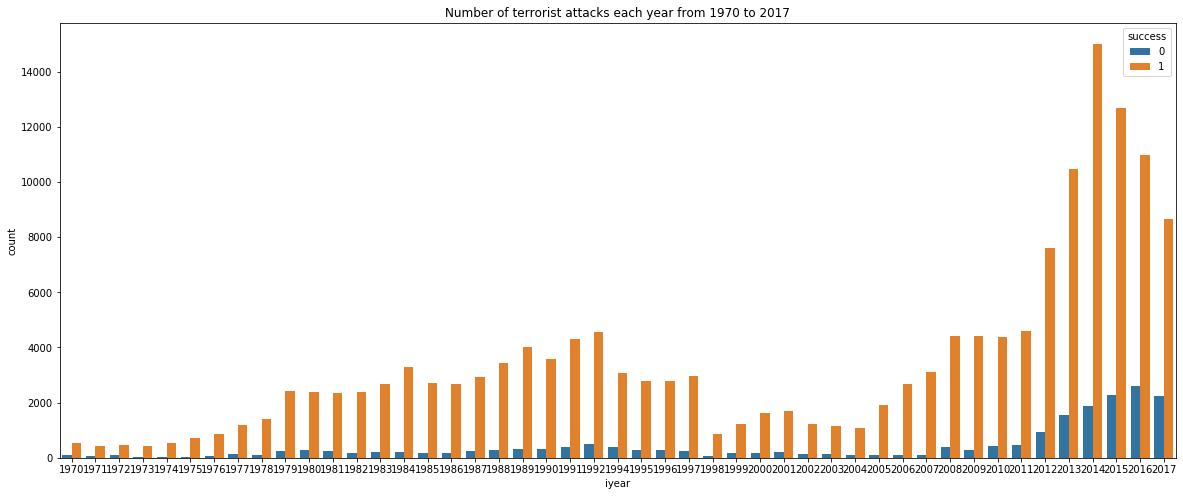

In [23]:
## Checking the no. of terrorist attack on each year
plt.figure(figsize=(20,8))

sns.countplot(x='iyear', hue='success', data=df)
plt.title('Number of terrorist attacks each year from 1970 to 2017')

In [24]:
# Checking attack cases increase percentage from 1970 to 2017
year = df.iyear.value_counts().to_dict()
attack_rate = ((year[2017] - year[1970])/year[2017])*100
print("No of attack happened in 1970 are: ", year[1970])
print("No of attack happened in 2017 are: ", year[2017])
print("Number of attacks from 1970 to 2017 has increased by",np.round(attack_rate, 2))

No of attack happened in 1970 are:  651
No of attack happened in 2017 are:  10900
Number of attacks from 1970 to 2017 has increased by 94.03


Text(0.5, 1.0, 'Number of Successfull and Unsuccessfull attack from 1970 to 2017')

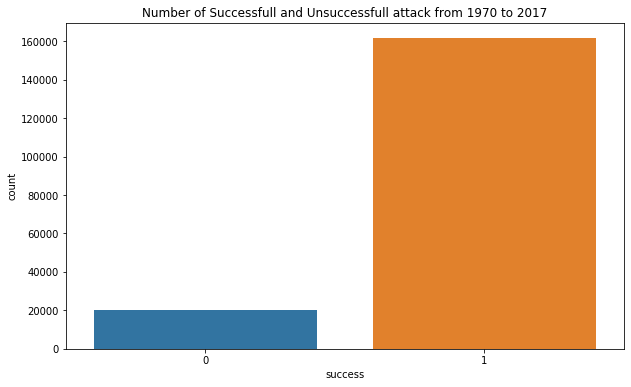

In [25]:
# Checking the Success and Failed attack cases from 1970 to 2017
plt.figure(figsize=(10,6))
sns.countplot(df.success)
plt.title("Number of Successfull and Unsuccessfull attack from 1970 to 2017")

In [26]:
# Creating a cross table to show how many attack in countries around the world were suicide 
# and number of successful and unsuccessful attacks.
pd.crosstab([df.country_txt, df.suicide], [df.success], margins=True).style.background_gradient(cmap="PuBu")

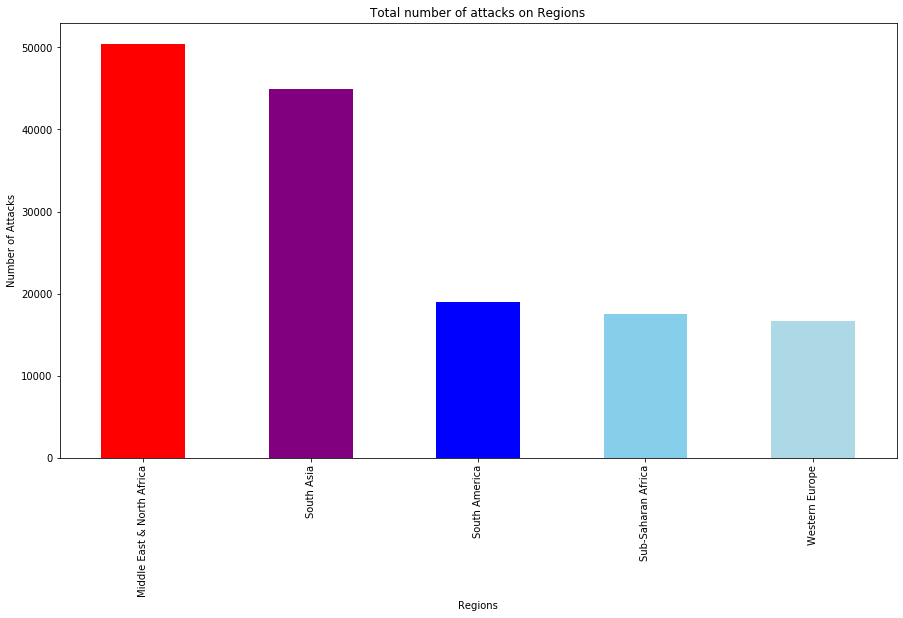

In [27]:
# Checking Top Regions which suffered the most attacks
plt.figure(figsize=(15,8))
df['region_txt'].value_counts()[:5].plot.bar(color=['red', 'purple', 'blue','skyblue', 'lightblue' ])
plt.title('Total number of attacks on Regions')
plt.xlabel('Regions')
plt.ylabel('Number of Attacks')
plt.show()

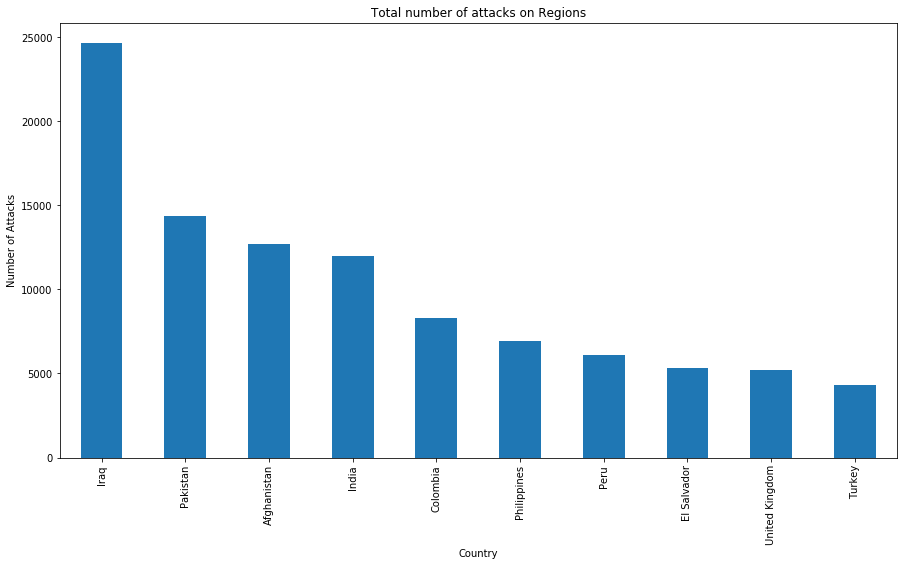

In [28]:
# Total Number of attacks on top 10 countries with most attacks
plt.figure(figsize=(15,8))
df['country_txt'].value_counts()[:10].plot.bar()
plt.title('Total number of attacks on Regions')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.show()

In [29]:
# Plotting the total number of attacks on each country in the globe
countries = df.groupby(['country_txt'], as_index=False).count()
countries

,country_txt,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,Afghanistan,12731,12731,12731,12731,1099,12731,102,12731,12731,...,3294,12607,8459,4571,12731,12731,12731,12731,12731,1662
1,Albania,80,80,80,80,0,80,0,80,80,...,8,25,14,10,80,80,80,80,80,6
2,Algeria,2743,2743,2743,2743,77,2743,53,2743,2743,...,737,1609,825,363,2743,2743,2743,2743,2743,144
3,Andorra,1,1,1,1,0,1,0,1,1,...,0,0,0,0,1,1,1,1,1,0
4,Angola,499,499,499,499,3,499,7,499,499,...,33,133,54,24,499,499,499,499,499,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yemen,3347,3347,3347,3347,590,3347,38,3347,3347,...,769,3264,1900,1141,3347,3347,3347,3347,3347,507
201,Yugoslavia,203,203,203,203,0,203,3,203,203,...,23,106,60,21,203,203,203,203,203,10
202,Zaire,50,50,50,50,0,50,0,50,50,...,0,3,3,3,50,50,50,50,50,3
203,Zambia,62,62,62,62,0,62,0,62,62,...,15,18,8,6,62,62,62,62,62,13


In [31]:
# Checking which country has suffered the maximum terrorist attacks.
max_count = countries['iyear'].max()
max_id = countries['iyear'].idxmax()
max_name = countries['country_txt'][max_id]
min_count = countries['iyear'].min()
min_id = countries['iyear'].idxmin()
min_name = countries['country_txt'][min_id]

In [32]:
print(max_name, " has suffered maximum number of attacks of ", max_count)
print(min_name, " has suffered minimum number of attacks of ", min_count)

Iraq  has suffered maximum number of attacks of  24636
Andorra  has suffered minimum number of attacks of  1
